### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
####################################################################
#PROJECT NAME: Foundation for AIML - MovieLens Data Exploration    #    
#                                                                  #
#                                                                  #                    
#PROGRAM NAME: MovieLens Project Questions                         #
#                                                                  #
#AUTHOR:     Kevin Kluck                                           #
#DATE:       6/12/2020                                             #
#                                                                  #
#Python Version:3.7.6                                              #      
#                                                                  #
#                                                                  #         
#ABSTRACT:Data exploration of the movieLens data sets              #         
#                                                                  #
####################################################################

#### 1. Import the necessary packages - 2.5 marks

In [2]:
##############################
##                          ##
##      Import Libraries    ##
##                          ##
##############################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
##############################
##                          ##
##      Load Data           ##
##                          ##
##############################

########### Special thanks to  GroupLens Research Project  group for putting together these data sets ####
dataratings = pd.read_csv('data.csv')

users = pd.read_csv('user.csv')

movies = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
##################################
##                              ##
##      Explore data ratings    ##
##                              ##
##################################

print(dataratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [5]:
print(dataratings.shape)

(100000, 4)


In [6]:
print(dataratings.describe)

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>


In [7]:
###### Check for dublicates in users
duplicate = dataratings['user id'].duplicated()
print(sum(duplicate))


99057


In [8]:
############# Check for missing values
print(pd.DataFrame(dataratings.isnull().sum(), columns= ['Number of missing values']))

           Number of missing values
user id                           0
movie id                          0
rating                            0
timestamp                         0


In [9]:
##################################
##                              ##
##      Explore users           ##
##                              ##
##################################

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [10]:
print(users.shape)

(943, 5)


In [11]:
print(users.describe)

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>


In [12]:
######### Check for missing
print(pd.DataFrame(users.isnull().sum(), columns= ['Number of missing values']))

            Number of missing values
user id                            0
age                                0
gender                             0
occupation                         0
zip code                           0


In [13]:
############ Explore a little further just in case missing values weren't picked up #############
print(users['gender'].value_counts())

M    670
F    273
Name: gender, dtype: int64


In [14]:
users['occupation'].value_counts()

##################################
## Note occupation of 'none' is possibly not missing because people sometimes don't have a job.          ##

##################################


student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [15]:
users['zip code'].value_counts()

55414    9
55105    6
10003    5
55337    5
20009    5
        ..
64118    1
17036    1
49931    1
66221    1
37212    1
Name: zip code, Length: 795, dtype: int64

In [16]:
users.sort_values('zip code',  ascending = True)
#There are values with 0 as the zip code and ones with letters
#There is no place with zip code of 00000. On the other hand, there are places
# with zip codes with letters in other countries, out side of the United States.
# Another note, I'm not sure what country has a zip code with format LNLNL

,user id,age,gender,occupation,zip code
766,767,70,M,engineer,00000
185,186,39,F,executive,00000
8,9,29,M,student,01002
38,39,41,M,entertainment,01040
230,231,48,M,librarian,01080
...,...,...,...,...,...
332,333,47,M,other,V0R2M
856,857,35,F,administrator,V1G4L
144,145,31,M,entertainment,V3N4P
489,490,29,F,artist,V5A2B


In [17]:
##################################
##                              ##
##      Explore data ratings    ##
##                              ##
##################################

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [18]:
movies.shape

(1681, 22)

In [19]:
movies.describe

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

In [20]:
pd.DataFrame(movies.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [21]:
# use sum on the default axis
pd.DataFrame(movies.iloc[:,3:22].sum(), columns= ['Number of Movies per Genre'])

,Number of Movies per Genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [22]:
genres = movies.columns.values.tolist()[3:]
movies['genre_total'] = movies[genres].sum(axis=1)
movies[movies['genre_total'] > 1]['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [23]:
movies_drop = movies[(movies['unknown']!=1)]
#Check to see if observation is removed
pd.DataFrame(movies_drop.iloc[:,3:4].sum(), columns= ['Number of Movies per Genre'])

,Number of Movies per Genre
unknown,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [24]:
######## Merge all the data sets together ###########

rating_user = pd.merge(dataratings,users,how='outer',on='user id') 
df_all = pd.merge(rating_user,movies,how='outer',on='movie id')


####### Check new data set #####
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user id       100000 non-null  int64  
 1   movie id      100000 non-null  int64  
 2   rating        100000 non-null  int64  
 3   timestamp     100000 non-null  int64  
 4   age           100000 non-null  int64  
 5   gender        100000 non-null  object 
 6   occupation    100000 non-null  object 
 7   zip code      100000 non-null  object 
 8   movie title   99991 non-null   object 
 9   release date  99991 non-null   object 
 10  unknown       99991 non-null   float64
 11  Action        99991 non-null   float64
 12  Adventure     99991 non-null   float64
 13  Animation     99991 non-null   float64
 14  Childrens     99991 non-null   float64
 15  Comedy        99991 non-null   float64
 16  Crime         99991 non-null   float64
 17  Documentary   99991 non-null   float64
 18  Drama

In [25]:
split_year = df_all["release date"].str.split("-", n = 2, expand = True) 

####### Check results ######
split_year.head()


,0,1,2
0,24,Jan,1997
1,24,Jan,1997
2,24,Jan,1997
3,24,Jan,1997
4,24,Jan,1997


In [26]:
df_all["release year"]= split_year[2] 

df_all.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total,release year
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997


Text(0.5, 1.0, 'Distribution of Age')

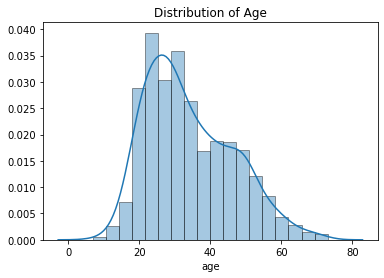

In [27]:
#Distplot for age, looking at how the distrution of ages

##### Use data just from users because there are dublicates of users in all data sets, since the same user
###### watched multiple movies.

sns.distplot(users['age'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Age')


##### data looks a little skewed right  ######

Text(0.5, 1.0, 'Counts by Gender')

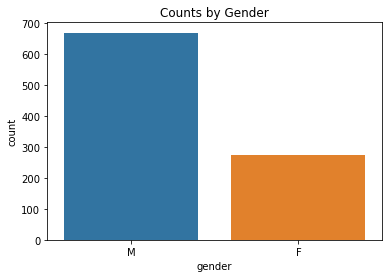

In [28]:
#Count plots for gender,ratings,occupation

##### Use data just from users because there are dublicates of users in all data sets, since the same user
###### watched multiple movies.

sns.countplot(x = users['gender'])
plt.title('Counts by Gender')


Text(0.5, 1.0, 'Counts by Rating')

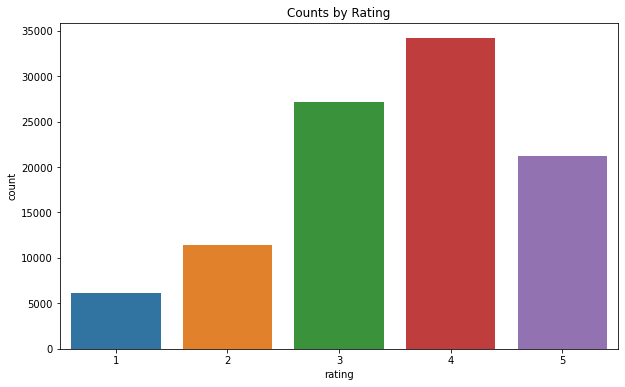

In [29]:
plt.figure(figsize=(10,6))

sns.countplot(x = df_all['rating'])
plt.title('Counts by Rating')

Text(0.5, 1.0, 'Counts by Rating per Gender')

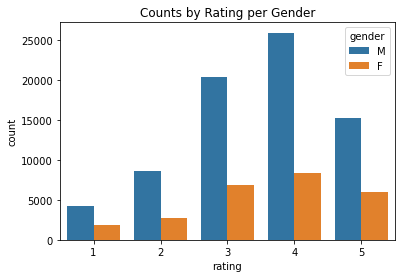

In [30]:

sns.countplot(x = df_all['rating'], hue = df_all['gender'])
plt.title('Counts by Rating per Gender')

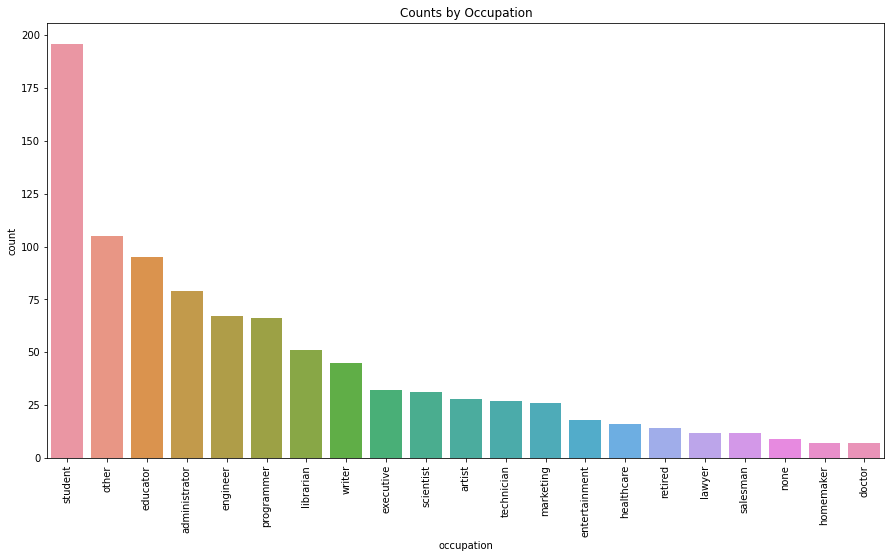

In [31]:
##### Use data just from users because there are dublicates of users in all data sets, since the same user
###### watched movies

plt.figure(figsize=(15,8))
sns.countplot(x = users['occupation'], order = users['occupation'].value_counts().index)
plt.title('Counts by Occupation')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of Year')

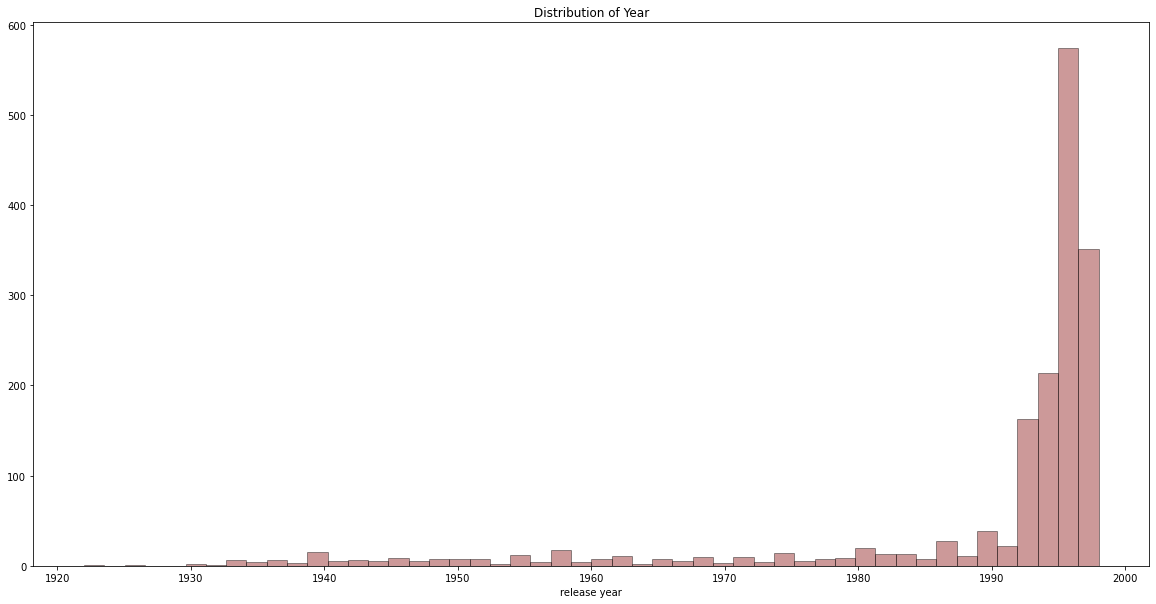

In [32]:
#Release Years

movies2 = movies
split_year2 = movies["release date"].str.split("-", n = 2, expand = True) 
movies2["release year"]= split_year2[2] 

plt.figure(figsize=(20,10))
sns.distplot(movies2['release year'], kde=False, color="maroon", hist_kws=dict(edgecolor="k", linewidth=1))

plt.title('Distribution of Year')

####### People mainly watch the newer movies   ######## 

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [33]:
######### Index by release year and get only columns that are genres ###########

df8=movies2.iloc[:,3:25]
df8.head()
df8.drop(columns = 'genre_total')
#df8.reset_index(inplace=True)
df8.set_index('release year',inplace=True)
df8.head()


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
release year,,,,,,,,,,,,,,,,,,,,
1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3


In [34]:
################## Group by year and get the sum of genre for each year #############

df8_grouped = df8.groupby('release year').sum()
df8_grouped

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


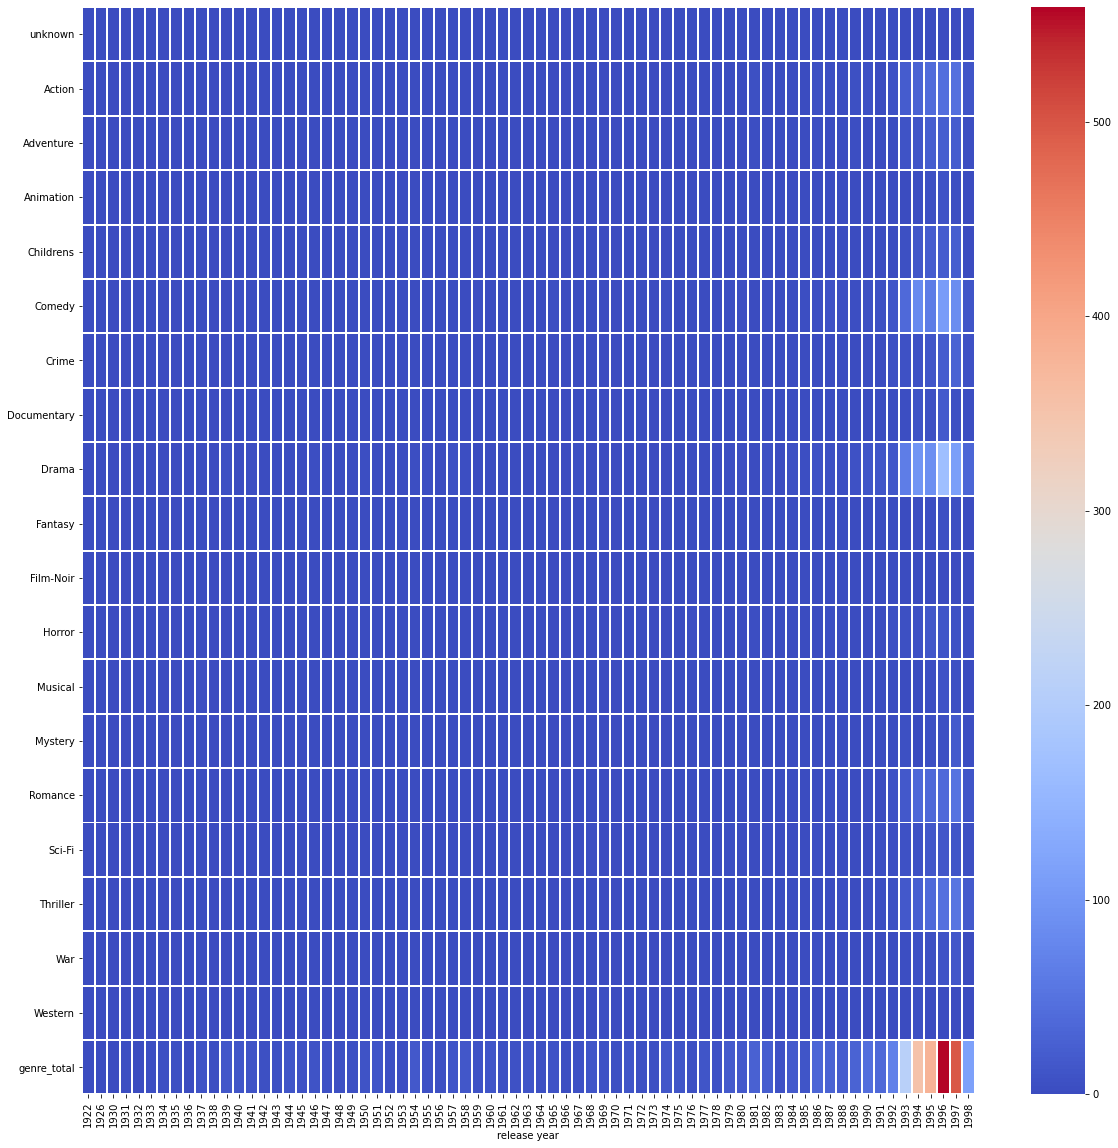

In [35]:
#Your answer here
plt.figure(figsize=(20,20))
sns.heatmap(df8_grouped.T, linewidths=1, cmap='coolwarm') 
#This Graph shows off the ninties have way more movies than past years

In [36]:
df8_grouped.tail(40)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
release year,,,,,,,,,,,,,,,,,,,,
1959,0,1,1,0,1,3,1,0,1,0,0,0,0,0,0,0,1,0,0,9
1960,0,0,1,0,2,2,1,0,2,0,0,1,0,0,1,0,2,0,0,12
1961,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,1,0,0,5
1962,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,2,1,0,8
1963,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,2,0,12
1964,0,0,0,0,1,1,0,0,0,0,0,0,2,0,1,0,0,0,0,5
1965,0,1,0,0,1,3,0,0,1,0,0,0,2,1,0,1,0,0,0,10
1966,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3
1967,0,0,0,0,0,1,1,0,5,0,0,0,0,0,1,0,0,0,0,8


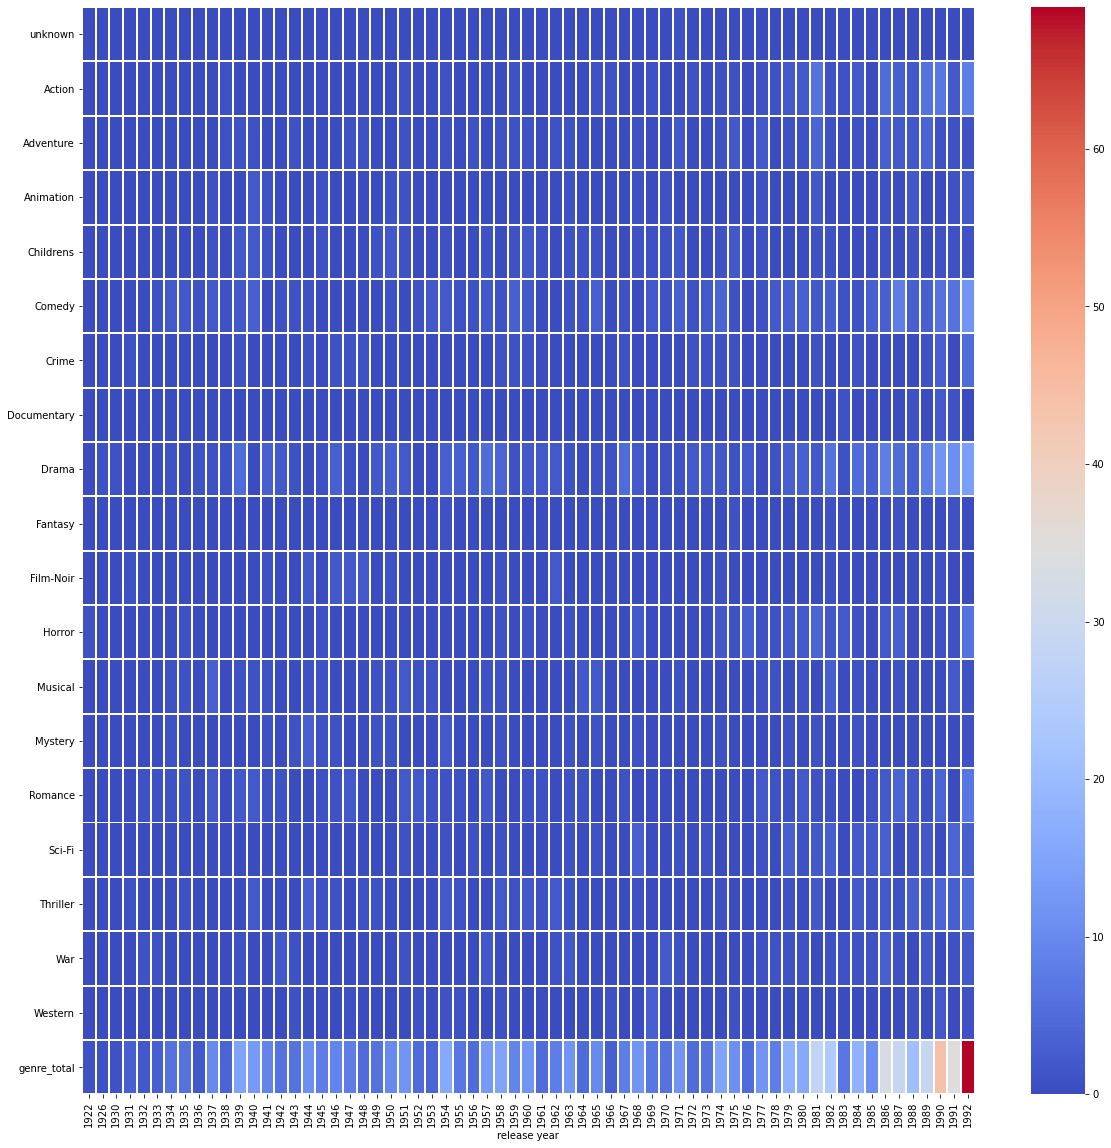

In [37]:
# Another graph for more info

# Since '93 to 98 had some many more movies come out, lets drop these years so we can see difference trends in past years

df8_new = df8_grouped.drop([ "1993", "1994", "1995", "1996", "1997", "1998"], axis =0)
plt.figure(figsize=(20,20))
sns.heatmap(df8_new.T, linewidths=1, cmap='coolwarm') 


# Since we have removed the late ninties we can see past trends a little more clearly.

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [38]:
########### Merge data sets #####################
df9 = pd.merge(dataratings,movies,how='outer',on='movie id')

##### Keep variables needed #####################

df9a = df9.iloc[:,np.r_[4,6:25]]
df9a.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie title  99991 non-null  object 
 1   unknown      99991 non-null  float64
 2   Action       99991 non-null  float64
 3   Adventure    99991 non-null  float64
 4   Animation    99991 non-null  float64
 5   Childrens    99991 non-null  float64
 6   Comedy       99991 non-null  float64
 7   Crime        99991 non-null  float64
 8   Documentary  99991 non-null  float64
 9   Drama        99991 non-null  float64
 10  Fantasy      99991 non-null  float64
 11  Film-Noir    99991 non-null  float64
 12  Horror       99991 non-null  float64
 13  Musical      99991 non-null  float64
 14  Mystery      99991 non-null  float64
 15  Romance      99991 non-null  float64
 16  Sci-Fi       99991 non-null  float64
 17  Thriller     99991 non-null  float64
 18  War          99991 non-null  float64
 19  Wes

In [39]:

df9a_group= df9a.groupby('movie title').sum()

df9a_group["Sum"] = df9a_group.max(axis=1) ####### Some movies have more than one genre so can't do a sum


df100 = df9a_group[(df9a_group['Sum']>100)] #Keep movies that have been ratted more than 100

df100 = df100.reset_index()
df100 = df100.iloc[:,np.r_[0,20]]
df9b = pd.merge(df9,df100,how='inner',on='movie title') # Merge data sets to only have movies with more than 100 ratings
df9b.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total,release year,Sum
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997,117.0
1,63,242,3,875747190,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997,117.0
2,226,242,5,883888671,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997,117.0
3,154,242,3,879138235,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997,117.0
4,306,242,5,876503793,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997,117.0


In [40]:
df9b = df9b.iloc[:,np.r_[2,4]]

df9 = df9b.groupby('movie title').mean() ########### Find average rating per movie
df9= df9.sort_values(['rating'],ascending=False) ###### put list in decending order
df9= df9.iloc[0:25,:] ########## Need top 24


In [41]:
#your answer here
print(df9)

                                                      rating
movie title                                                 
Close Shave, A                                      4.491071
Schindler's List                                    4.466443
Wrong Trousers, The                                 4.466102
Casablanca                                          4.456790
Shawshank Redemption, The                           4.445230
Rear Window                                         4.387560
Usual Suspects, The                                 4.385768
Star Wars                                           4.358491
12 Angry Men                                        4.344000
Citizen Kane                                        4.292929
To Kill a Mockingbird                               4.292237
One Flew Over the Cuckoo's Nest                     4.291667
Silence of the Lambs, The                           4.289744
North by Northwest                                  4.284916
Godfather, The          

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [43]:
Genre_by_gender = df_all.groupby('gender').sum().loc[:,'Action':'Western'] 
#Group by gender and aggregate with sum and select all the genre columns 

Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100 

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


#### Conclusion:



Of all the women, 20% watched Drama and of all the men, 18% watched Drama. Of all the women, 4.8% watched Sci-Fi and of all the men. 6.3% watched Sci-Fi Of all the women, 10.9% watched Romance and of all the men, 8.6% watched Romance. So all the statments are false.